# Making Words-Network

Implement social network for making graph of words connection in the Hoax corpus

In [36]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()


## Remove Stopwords

In [37]:
#removing stopwords

f1 = open('all_hoax.txt', 'r')
f2 = open('/home/adhanindita/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/lda/stopwords_id.txt', 'r')
f3 = open("all_hoax_stprmvd.txt","w")
first_words=[]
second_words=[]
for line in f1:
    words = line.split()
    for w in words:
        first_words.append(w)

for line in f2:
    w = line.split()
    for i in w:
        second_words.append(i)


for word1 in first_words :
    for word2 in second_words:
        if word1 == word2:
            while True:
                try:
                    first_words.remove(word2)
                except:
                    break
            

for word in first_words:
    f3.write(word)
    f3.write(' ')

f1.close()
f2.close()
f3.close()

  

## Remove symbol

In [38]:
import re
string = open('all_hoax_stprmvd.txt').read()
new_str = re.sub('[^a-zA-Z0-9\n]', ' ', string)
open('all_hoax_nosym.txt', 'w').write(new_str)

35566

## Add Edges to network

In [39]:
berita = open("all_hoax_nosym.txt","r").read()

words = berita.split()

for idx in range(1, len(words)):
    print(words[idx-1], words[idx])
    G.add_edge(words[idx-1], words[idx])
    

Terungkapnya jaringan
jaringan Saracen
Saracen pemberitaan
pemberitaan menyedot
menyedot perhatian
perhatian pihak
pihak Di
Di tengah
tengah tengah
tengah pemberitaan
pemberitaan penyelidikan
penyelidikan polisi
polisi sindikat
sindikat ini
ini beredar
beredar informasi
informasi aksi
aksi penyebar
penyebar kebencian
kebencian ini
ini Salah
Salah satunya
satunya beredar
beredar luas
luas media
media sosial
sosial kabar
kabar Pegawai
Pegawai Negeri
Negeri Sipil
Sipil PNS
PNS lingkungan
lingkungan Pemkab
Pemkab Bantul
Bantul dikabarkan
dikabarkan terlibat
terlibat jaringan
jaringan Saracen
Saracen Foto
Foto KTP
KTP nama
nama Dwi
Dwi Ratna
Ratna Supri
Supri Hastuti
Hastuti 52
52 menyebar
menyebar cepat
cepat keterangan
keterangan bawahnya
bawahnya meyebutkan
meyebutkan Ratna
Ratna anggota
anggota Saracen
Saracen Lebih
Lebih isu
isu pemilik
pemilik KTP
KTP ditangkap
ditangkap polisi
polisi terkait
terkait sindikat
sindikat Saracen
Saracen Isu
Isu dihembuskan
dihembuskan kali
kali pemilik
p

tawuran warga
warga infonya
infonya warga
warga ambon
ambon vs
vs warga
warga pribumi
pribumi budi
budi asih
asih Jangan
Jangan dewi
dewi sartika
sartika karenakan
karenakan korban
korban tawuran
tawuran berlanjut
berlanjut malam
malam Pesan
Pesan kedua
kedua Kepada
Kepada teman2s
teman2s hindari
hindari jalan
jalan raya
raya bogor
bogor arah
arah cililitan
cililitan bentrokan
bentrokan melebar
melebar arah
arah uki
uki cawang
cawang kramat
kramat jati
jati Info
Info melintasi
melintasi jln
jln celilitan
celilitan hati
hati hati
hati perang
perang FBR
FBR AMBONBroadcast
AMBONBroadcast menyebutkan
menyebutkan titik
titik Jakarta
Jakarta Selatan
Selatan mode
mode penilangan
penilangan via
via CCTV
CCTV Dijelaskan
Dijelaskan broadcast
broadcast itu
itu CCTV
CCTV dipakai
dipakai mode
mode zoom
zoom detail
detail nopol
nopol tindakan
tindakan pelanggaran
pelanggaran pengendara
pengendara Berikut
Berikut isi
isi broadcast
broadcast tersebut
tersebut INFO
INFO Yangg
Yangg melintas
melintas di

tangan Ttpi
Ttpi kotanya
kotanya d
d landa
landa gmpa
gmpa bumi
bumi kuat
kuat byi
byi tdk
tdk trselamatkan
trselamatkan dri
dri rerun
rerun than
than rmh
rmh skt
skt Dia
Dia pnasaran
pnasaran ibunya
ibunya byi
byi d
d kbur
kbur Dan
Dan pda
pda jam
jam 23
23 35
35 byi
byi brjalan
brjalan mnembus
mnembus tmbok
tmbok kmar
kmar dn
dn membunuh
membunuh Krim
Krim k
k semua
semua kntak
kntak jka
jka tdk
tdk tangan
tangan dn
dn mnjadi
mnjadi krban
krban Jka
Jka mengirimnya
mengirimnya selamat
selamat Buktinya
Buktinya 1
1 Sari
Sari 11
11 thn
thn dy
dy mengabaikan
mengabaikan psan
psan dn
dn pda
pda jam
jam 23
23 35
35 dn
dn tangannya
tangannya d
d potong
potong 2
2 Doni
Doni 28
28 thn
thn dy
dy tdk
tdk mempercayai
mempercayai psan
psan dn
dn kejadian
kejadian dy
dy dpt
dpt tangan
tangan dn
dn ibunya
ibunya 70
70 thn
thn mnjadi
mnjadi krban
krban 3
3 Ica
Ica 16
16 thn
thn dy
dy prcaya
prcaya dn
dn mengirimkan
mengirimkan psan
psan k
k semua
semua kntak
kntak Pda
Pda jam
jam 23
23 35
35 dy
dy m

Anda Kerabat
Kerabat teman
teman berita
berita Jangan
Jangan teruskan
teruskan tulisan
tulisan video
video dll
dll Anda
Anda menerima
menerima postingan
postingan situasi
situasi politik
politik Pemerintahan
Pemerintahan PM
PM dll
dll Polisi
Polisi mengeluarkan
mengeluarkan pemberitahuan
pemberitahuan Kejahatan
Kejahatan Cargo
Cargo tindakan
tindakan bila
bila hapus
hapus postingan
postingan masuk
masuk merugikan
merugikan Menulis
Menulis meneruskan
meneruskan pesan
pesan apapun
apapun perdebatan
perdebatan politik
politik agama
agama pelanggaran
pelanggaran penangkapan
penangkapan surat
surat perintah
perintah Informasikan
Informasikan berita
berita orang
orang waspada
waspada Ini
Ini serius
serius kelompok
kelompok anggota
anggota individu
individu Bila
Bila Admin
Admin Group
Group besar
besar Beritahu
Beritahu orang
orang berhati
berhati hati
hati Tolong
Tolong bagikan
bagikan Ini
Ini berguna
berguna Admin
Admin group
group mohon
mohon berhati
berhati hati


## Draw Graph

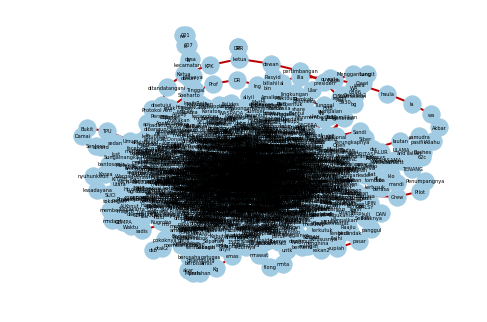

In [40]:
labels = {}

for idx in range(len(words)):
    labels[idx] = words[idx]
    
pos = nx.spring_layout(G)
nx.draw(G,pos,node_color='#A0CBE2',font_size = 5, scale=3, edge_color='#BB0000', width=2, edge_cmap=plt.cm.Blues, with_labels=True)
plt.savefig("graph.png", dpi=1000)
#nx.draw_networkx_nodes(G, pos)
#nx.draw_networkx_edges(G, pos)
#nx.draw_networkx_labels(G, pos)
#nx.draw(G, with_labels=True, node_size=5, font_size=5, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
#plt.show()